<a href="https://colab.research.google.com/github/Tapasyasunil/Guvi-tasks/blob/main/takehome_user_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
engagement = pd.read_csv('takehome_user_engagement.csv',encoding = "ISO-8859-1")
users = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")

In [5]:
engagement.head(20)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [8]:
users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [10]:

users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [12]:
users.rename(columns = {'object_id':'user_id'}, inplace = True)

users.head()

In [13]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)

engagement.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [14]:
def rolling_count(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()

engagement['visits_7_days'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')
engagement.head(20)

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
5,2013-12-31 03:45:04,2,1,2.0
6,2014-01-08 03:45:04,2,1,1.0
7,2014-02-03 03:45:04,2,1,1.0
8,2014-02-08 03:45:04,2,1,2.0
9,2014-02-09 03:45:04,2,1,3.0


In [15]:
engagement_1 = engagement.groupby('user_id')[['visits_7_days']].max()
engagement_1.head()

,visits_7_days
user_id,
1,1.0
2,3.0
3,1.0
4,1.0
5,1.0


In [16]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)

In [17]:
#Checking if user visits is more than 3, to determine adopted users
engagement_1.loc[engagement_1['visits_7_days'] >= 3,'adopted_user'] = 1
engagement_1.loc[engagement_1['visits_7_days'] < 3,'adopted_user'] = 0
engagement_1.head(50)

,visits_7_days,adopted_user
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
10,7,1.0
11,1,0.0


In [18]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)
engagement_1['adopted_user'] = engagement_1['adopted_user'].astype(int)
engagement_1['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [19]:
engagement_1.head()

,visits_7_days,adopted_user
user_id,,
1,1,0
2,3,1
3,1,0
4,1,0
5,1,0


In [20]:
engagement.head()

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [21]:
#getting first login date of user
time = engagement.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
time.head()

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


In [22]:
#Merging both dataframes into one
df = users.merge(engagement_1, how = 'left',on = 'user_id',sort = True)
df = df.merge(time,how='left',on = 'user_id',sort = True)
df = df.rename({'time_stamp':'first_login'},axis = 'columns')
df.head(20)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,0.0,2013-12-19 03:37:06
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0,0.0,2012-12-20 13:24:32
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN,NaN,NaT
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN,NaN,NaT
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,7.0,1.0,2013-01-16 22:08:03


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  visits_7_days               8823 non-null   float64       
 11  adopted_user                8823 non-null   float64   

In [24]:
df.creation_time = pd.to_datetime(df.creation_time)

In [25]:
#feature engineering: to et time diff bertween first login and creation time, to ccreate a new feature
df['first_login_creation_gap'] = (df['first_login']-df['creation_time']).dt.days

df.head(20)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,0.0,2013-12-19 03:37:06,2.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0,0.0,2012-12-20 13:24:32,4.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN,NaN,NaT,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN,NaN,NaT,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,7.0,1.0,2013-01-16 22:08:03,0.0


In [26]:
#Feature eng: getting avg login time to have mean_login_gap_length feature
user_login_gap = engagement.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
user_login_gap = pd.DataFrame(user_login_gap)
user_login_gap.columns = ['mean_login_gap_length']
user_login_gap.head()
user_login_gap.info()

<ipython-input-26-2162271ae90d>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  user_login_gap = engagement.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days


<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 1 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mean_login_gap_length  199094 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


In [27]:
user_login_gap.head()

,mean_login_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [28]:
engagement = engagement.merge(user_login_gap, left_index = True, right_index = True)
engagement.head()

,time_stamp,user_id,visited,visits_7_days,mean_login_gap_length
0,2014-04-22 03:53:30,1,1,1.0,NaN
1,2013-11-15 03:45:04,2,1,1.0,NaN
2,2013-11-29 03:45:04,2,1,1.0,14.0
3,2013-12-09 03:45:04,2,1,1.0,10.0
4,2013-12-25 03:45:04,2,1,1.0,16.0


In [29]:
gap_mean = engagement.groupby('user_id').agg({'mean_login_gap_length' : np.mean})
gap_mean.head()

,mean_login_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [30]:
df = df.merge(gap_mean, how = 'left', on = 'user_id')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN


In [31]:
#feature eng: creating new feature org_id by cluster org_id into diff sizes

df.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [32]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'


    return value

df['org_size'] = df.org_id.apply(org_size)

df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


In [ ]:
#creating new feature email_domain, to group by domains
df['email_domain'] = ''
for index, row in df.iterrows():
  email = row['email']
  email_parts = email.split('@')
  if len(email_parts) == 2:
        domain = email_parts[1]  # Extract the domain name
        df.at[index, 'email_domain'] = domain  # Assign the domain name to the new column

# Print the updated dataframe
print(df)

In [37]:
df.email_domain.value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: email_domain, Length: 1184, dtype: int64

In [39]:
def email(x):
    value = 'other'
    if x == 'gmail.com':
        value = 'gmail'
    elif x == 'yahoo.com':
        value = 'yahoo'
    elif x == 'jourrapide.com':
        value = 'jourrapide'
    elif x == 'cuvox.de':
        value =='cuvox'
    elif x == 'gustr.com':
        value = 'gustr'
    elif x== 'hotmail.com':
        value = 'hotmail'
    return value

df['email']=df['email_domain'].apply(email)
df.email.value_counts()

gmail         3562
yahoo         2447
other         2388
jourrapide    1259
gustr         1179
hotmail       1165
Name: email, dtype: int64

In [40]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size,email_domain
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,yahoo.com


In [41]:
#feature eng: normalizing creation time since values are too big to compare
df.last_session_creation_time.head(20)


0     1.398139e+09
1     1.396238e+09
2     1.363735e+09
3     1.369210e+09
4     1.358850e+09
5     1.387424e+09
6     1.356010e+09
7              NaN
8              NaN
9     1.401833e+09
10    1.388117e+09
11             NaN
12    1.396196e+09
13    1.350058e+09
14             NaN
15             NaN
16    1.397314e+09
17             NaN
18    1.369926e+09
19    1.401364e+09
Name: last_session_creation_time, dtype: float64

In [42]:
df['last_session_creation_time'] = df['last_session_creation_time']/(10000000)
df['last_session_creation_time'].head(20)

0     139.813881
1     139.623750
2     136.373489
3     136.921017
4     135.884966
5     138.742423
6     135.600987
7            NaN
8            NaN
9     140.183328
10    138.811655
11           NaN
12    139.619638
13    135.005847
14           NaN
15           NaN
16    139.731358
17           NaN
18    136.992580
19    140.136400
Name: last_session_creation_time, dtype: float64

In [43]:
#Feature eng: clustering invited_by_user_id
df.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [45]:
def group_size(x):
    value = 'small'
    if x > 10:
        value = 'Large'
    elif x > 5:
        value = 'medium'

    elif x == 0:
        value = np.nan
    return value

df['group_size'] = df.invited_by_user_id.apply(group_size)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size,email_domain,group_size
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,yahoo.com,Large
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,gustr.com,Large
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,gustr.com,Large
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,yahoo.com,Large
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,yahoo.com,Large


In [46]:
df.creation_source.value_counts()
df.adopted_user.value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [47]:
df[['user_id','adopted_user']]

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
11995,11996,0.0
11996,11997,0.0
11997,11998,0.0
11998,11999,0.0


In [48]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','email_domain','visits_7_days','first_login'], axis = 1)
df.head()

,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,yahoo,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,gustr,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,gustr,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,yahoo,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,yahoo,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large


In [49]:
#dummy variable to convert string to number

df = pd.get_dummies(df, columns = ['creation_source', 'org_size', 'group_size','email'])

In [50]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_size_small,group_size_Large,group_size_medium,group_size_small,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_other,email_yahoo
0,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
2,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [51]:
df.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_size_small,group_size_Large,group_size_medium,group_size_small,email_gmail,email_gustr,email_hotmail,email_jourrapide,email_other,email_yahoo
count,8823.000000,12000.000000,12000.000000,8823.000000,8823.000000,2588.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,137.927931,0.249500,0.149333,0.181571,1.001813,7.822104,0.180250,0.354500,0.175917,0.173917,...,0.481833,0.534167,0.000500,0.465333,0.296833,0.098250,0.097083,0.104917,0.199000,0.203917
std,1.953116,0.432742,0.356432,0.385512,1.401329,7.039812,0.384412,0.478381,0.380765,0.379054,...,0.499691,0.498852,0.022356,0.498818,0.456881,0.297665,0.296084,0.306459,0.399265,0.402925
min,133.845241,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.319497,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,138.288847,0.000000,0.000000,0.000000,1.000000,5.626453,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,139.844260,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,140.206673,1.000000,1.000000,1.000000,14.000000,60.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          8823 non-null   float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        8823 non-null   float64
 4   first_login_creation_gap            8823 non-null   float64
 5   mean_login_gap_length               2588 non-null   float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

In [53]:
#filling missing values wit mean

df.last_session_creation_time = df.last_session_creation_time.fillna(137.927931)
df.adopted_user = df.adopted_user.fillna(0)
df.first_login_creation_gap = df.first_login_creation_gap.fillna(1.001813)
df.mean_login_gap_length = df.mean_login_gap_length.fillna(7.822104)
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          12000 non-null  float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        12000 non-null  float64
 4   first_login_creation_gap            12000 non-null  float64
 5   mean_login_gap_length               12000 non-null  float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                 Specs        Score
4                mean_login_gap_length  2716.483567
7    creation_source_PERSONAL_PROJECTS    56.844560
0           last_session_creation_time    36.239314
12                      org_size_small    22.581597
5         creation_source_GUEST_INVITE    20.283149
21                         email_yahoo    15.237361
11                     org_size_medium    15.133797
9   creation_source_SIGNUP_GOOGLE_AUTH    13.848040
18                       email_hotmail    12.762762
16                         email_gmail    11.048830


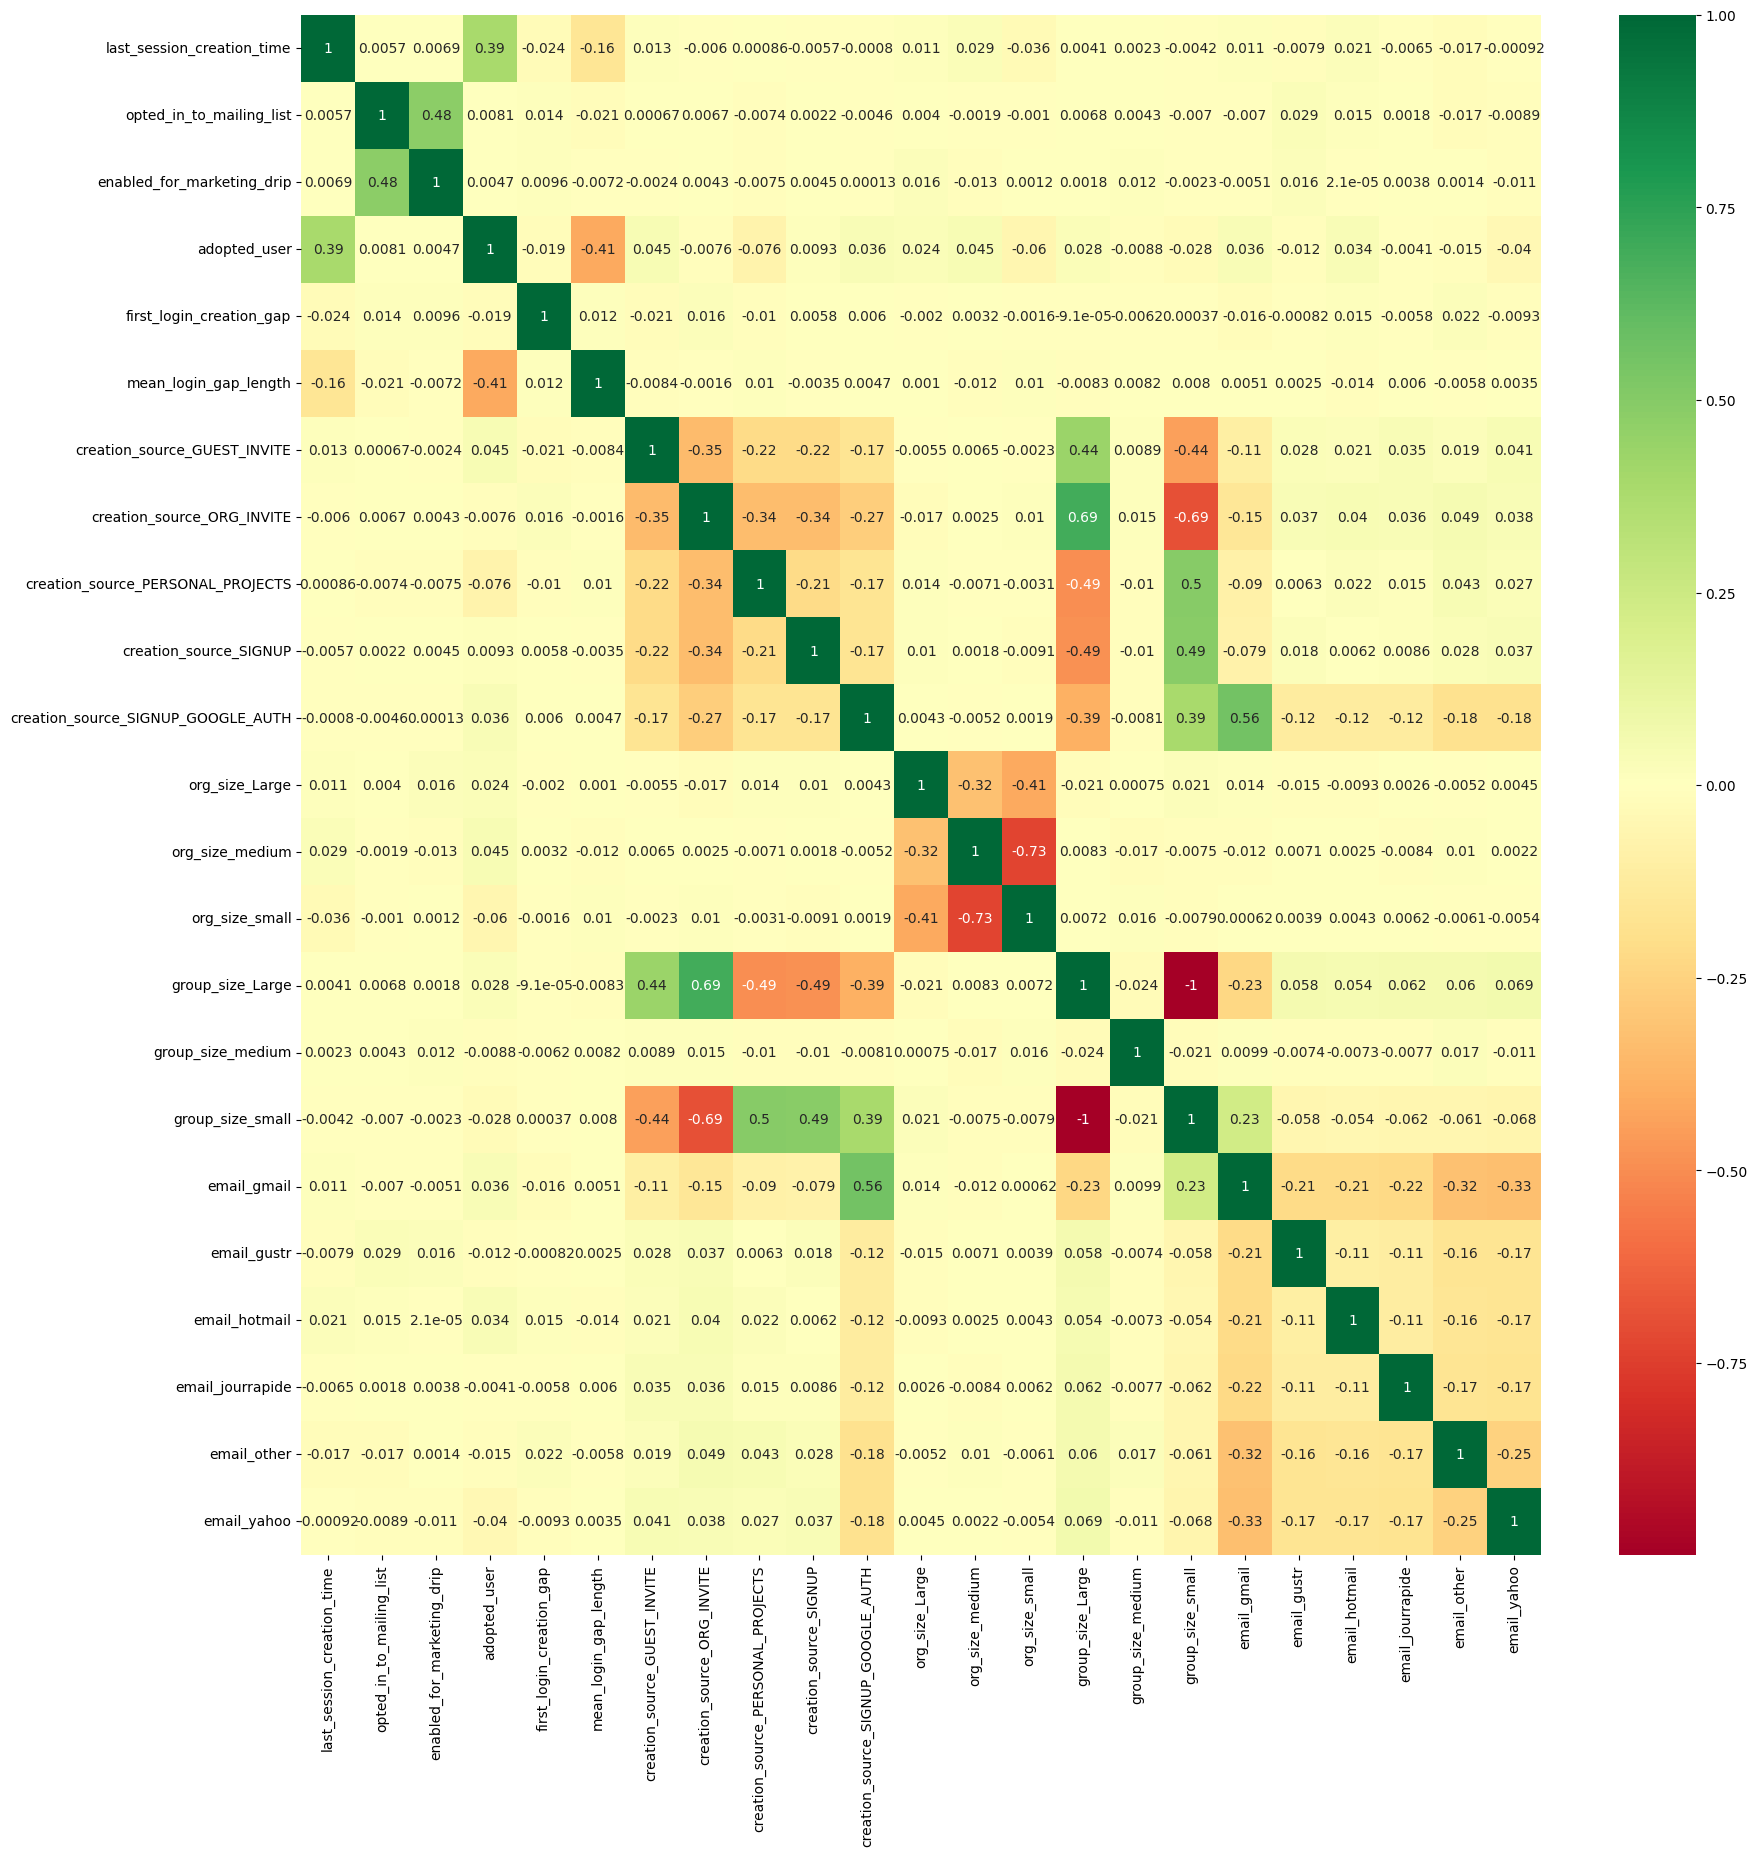

In [57]:
#co-relation matrix to plot heatmap

import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:
#Random forest model
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [59]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[3387   57]
 [  89  427]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      3444
         1.0       0.88      0.83      0.85       516

    accuracy                           0.96      3960
   macro avg       0.93      0.91      0.92      3960
weighted avg       0.96      0.96      0.96      3960



=== All AUC Scores ===
[0.98892428 0.99182692 0.98715144 0.99127704 0.98902945 0.98823918
 0.99066106 0.99176382 0.9856288  0.98900639]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9893508387426181


In [62]:
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

mean_login_gap_length                 0.600593
last_session_creation_time            0.290007
first_login_creation_gap              0.031378
opted_in_to_mailing_list              0.008518
enabled_for_marketing_drip            0.007120
org_size_small                        0.005786
org_size_medium                       0.005184
email_gmail                           0.005001
email_yahoo                           0.004689
email_other                           0.004626
org_size_Large                        0.004180
email_hotmail                         0.004124
creation_source_PERSONAL_PROJECTS     0.003975
email_gustr                           0.003787
creation_source_ORG_INVITE            0.003732
email_jourrapide                      0.003730
creation_source_GUEST_INVITE          0.003479
creation_source_SIGNUP                0.003295
creation_source_SIGNUP_GOOGLE_AUTH    0.002321
group_size_Large                      0.002255
group_size_small                      0.002212
group_size_me

In [63]:
type(feature_importance)

pandas.core.series.Series

In [64]:
fi = pd.DataFrame(feature_importance)

In [65]:
fi.columns = ['user']
new_fi = fi.reset_index()


In [66]:
new_fi.columns=['feature','score']

In [67]:
new_fi

,feature,score
0,mean_login_gap_length,0.600593
1,last_session_creation_time,0.290007
2,first_login_creation_gap,0.031378
3,opted_in_to_mailing_list,0.008518
4,enabled_for_marketing_drip,0.007120
5,org_size_small,0.005786
6,org_size_medium,0.005184
7,email_gmail,0.005001
8,email_yahoo,0.004689
9,email_other,0.004626


<Axes: ylabel='feature'>

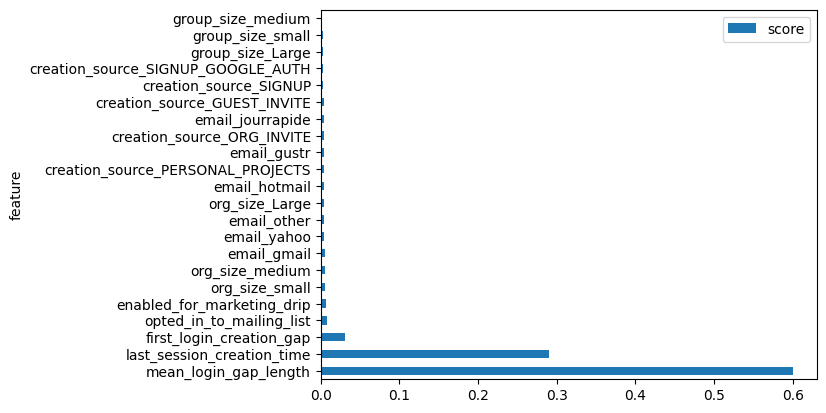

In [68]:
new_fi.plot(kind='barh',x='feature',y='score')